# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime 
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
Number_of_cities = len(cities)
Number_of_cities

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [100]:
#City	Lat	Lng	Max Temp	Humidity	Cloudiness	Wind Speed	Country	Date
#city_results = []
#Index_cities=[]

City_Number = []
City_Name = []
City_Lat = []
City_Lng = []
City_MaxTemp = []
City_Humidity = []
City_Cloudiness = []
City_WindSpeed = []
City_Country = []
City_Date = []
Count_Record = 0
#for city in cities:   

#weather_api_key= "a160fd00bbc7c7caddb54e2757ff85b2"
#city_ejempo=['London','Melbourne','Alaska','Jazan','Caracas','Harare','El Junquito','New Orleans',"GTY77","Maracay","Washington", "Pensilvanya", "Palita", "guarenas", "Atlanta", "Bogota"]

for city in cities[:100]:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial"
    #print(url) 
    Req_weather_city = requests.get(url).json()
    if (Req_weather_city["cod"]==200):
        Count_Record = Count_Record + 1
        City_Number.append(Req_weather_city['id'])
        City_Name.append(Req_weather_city['name'])
        City_Lat.append(Req_weather_city['coord']['lat'])
        City_Lng.append(Req_weather_city['coord']['lon'])
        City_MaxTemp.append(Req_weather_city['main']['temp'])
        City_Humidity.append(Req_weather_city['main']['humidity'])
        City_Cloudiness.append(Req_weather_city['clouds']['all'])
        City_WindSpeed.append(Req_weather_city['wind']['speed'])
        City_Country.append(Req_weather_city['sys']['country'])
        City_Date.append(Req_weather_city['dt'])
        print(f"Processing Record {Count_Record} of {Number_of_cities} |City number: {Req_weather_city['id']}, City name: {Req_weather_city['name']}")
    else: 
        #{"cod":"404","message":"city not found"}
        print(f"{city}: {Req_weather_city['message']}. Skipping...")

weather_dict = {
    "City": City_Name,
    "Lat": City_Lat,
    "Lng":City_Lng,
    "Temp": City_MaxTemp,
    "Humidity":City_Humidity,
    "Cloudiness":City_Cloudiness,
    "Wind Speed":City_WindSpeed,
    "Country":City_Country,
    "Date":City_Date 
}
meteorology_cities = pd.DataFrame(weather_dict)


Processing Record 1 of 613 |City number: 4944903, City name: Nantucket
Processing Record 2 of 613 |City number: 86049, City name: Jalu
Processing Record 3 of 613 |City number: 986717, City name: Kruisfontein
Processing Record 4 of 613 |City number: 6185377, City name: Yellowknife
Processing Record 5 of 613 |City number: 4030556, City name: Rikitea
Processing Record 6 of 613 |City number: 1734798, City name: Semenyih
Processing Record 7 of 613 |City number: 6201424, City name: Mataura
Processing Record 8 of 613 |City number: 3833367, City name: Ushuaia
Processing Record 9 of 613 |City number: 2020591, City name: Magdagachi
Processing Record 10 of 613 |City number: 4017152, City name: Benjamín Hill
Processing Record 11 of 613 |City number: 2208248, City name: Kaitangata
Processing Record 12 of 613 |City number: 3355672, City name: Lüderitz
Processing Record 13 of 613 |City number: 2163355, City name: Hobart
Processing Record 14 of 613 |City number: 2017155, City name: Saskylakh
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [101]:
# Export the city data into a .csv.
meteorology_cities.to_csv("output_data/meteorology_of_cities.csv", index=False, header=True)
# Display the DataFrame
for date_ in meteorology_cities['Date']:
    meteorology_cities['Date'] = datetime.fromtimestamp(date_).strftime('%m/%d/%Y')
meteorology_cities

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.2835,-70.0995,42.44,56,1,23.02,US,02/06/2021
1,Jalu,29.0331,21.5482,61.95,36,0,9.26,LY,02/06/2021
2,Kruisfontein,-34.0033,24.7314,69.01,80,1,5.01,ZA,02/06/2021
3,Yellowknife,62.4560,-114.3525,-32.94,67,1,3.47,CA,02/06/2021
4,Rikitea,-23.1203,-134.9692,77.95,72,100,11.56,PF,02/06/2021
...,...,...,...,...,...,...,...,...,...
90,Namatanai,-3.6667,152.4333,80.02,77,74,3.13,PG,02/06/2021
91,Japura,-0.3167,102.3500,72.68,92,86,1.95,ID,02/06/2021
92,Pacific Grove,36.6177,-121.9166,61.21,59,1,8.05,US,02/06/2021
93,Laguna,38.4210,-121.4238,61.41,55,1,3.44,US,02/06/2021


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [102]:
Weather_cities_statistic = meteorology_cities.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
Weather_cities_statistic

,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,10.623399,5.080961,51.948737,70.242105,43.305263,9.364842
std,39.166142,107.473730,32.706958,18.852572,37.792005,6.612260
min,-54.800000,-171.000000,-35.860000,14.000000,0.000000,1.430000
25%,-24.841650,-78.906800,36.985000,61.000000,1.000000,3.800000
50%,6.124100,15.159400,61.950000,76.000000,40.000000,7.110000
75%,42.348550,113.858300,75.705000,82.000000,75.000000,13.800000
max,77.484000,179.316700,94.120000,100.000000,100.000000,27.090000


In [103]:
#  Get the indices of cities that have humidity over 100%
#city_Hum100 =  meteorology_cities.index[meteorology_cities['Humidity'] > 100 ].tolist()
city_Hum100 = meteorology_cities[(meteorology_cities['Humidity'] > 100)]
if len(city_Hum100) == 0:
    clean_city_data = meteorology_cities.copy()
    print(f"Skip this step if there are no cities that have humidity > 100%.")
    print(city_Hum100.index)
else:
    clean_city_data = meteorology_cities[(meteorology_cities['Humidity'] < 100)]
    clean_city_data_statistic = clean_city_data.describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False)
    print(f"Indices of cities that have humidity over 100%.: {city_Hum100.index}")
    print(f"=========================================================================")
    print(f"{clean_city_data_statistic}")

Skip this step if there are no cities that have humidity > 100%.
Int64Index([], dtype='int64')


In [104]:
#which we call "clean_city_data"
clean_city_data

,City,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nantucket,41.2835,-70.0995,42.44,56,1,23.02,US,02/06/2021
1,Jalu,29.0331,21.5482,61.95,36,0,9.26,LY,02/06/2021
2,Kruisfontein,-34.0033,24.7314,69.01,80,1,5.01,ZA,02/06/2021
3,Yellowknife,62.4560,-114.3525,-32.94,67,1,3.47,CA,02/06/2021
4,Rikitea,-23.1203,-134.9692,77.95,72,100,11.56,PF,02/06/2021
...,...,...,...,...,...,...,...,...,...
90,Namatanai,-3.6667,152.4333,80.02,77,74,3.13,PG,02/06/2021
91,Japura,-0.3167,102.3500,72.68,92,86,1.95,ID,02/06/2021
92,Pacific Grove,36.6177,-121.9166,61.21,59,1,8.05,US,02/06/2021
93,Laguna,38.4210,-121.4238,61.41,55,1,3.44,US,02/06/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

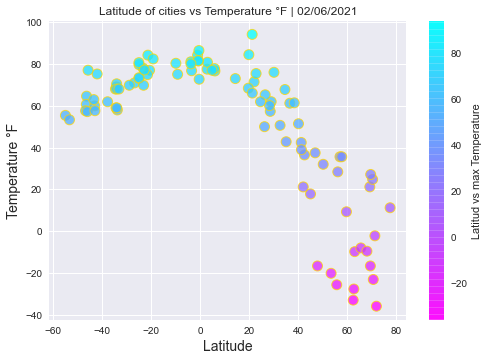

In [185]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Temp']
ratio = clean_city_data['Temp'] #[1, 0.53, 2, 0.76, 0.5, 2.125, 0.56, 1.28, 1.09, 1.02]
plt.scatter(x, y, s=100, c=ratio, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Temperature °F", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs max Temperature')


## Latitude vs. Humidity Plot

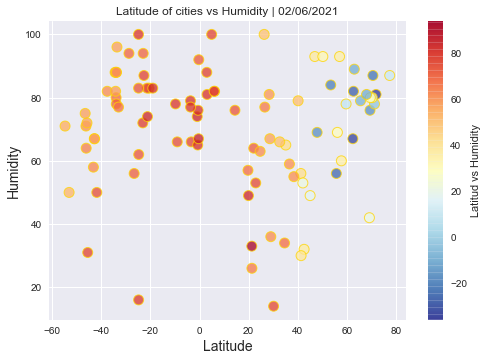

In [186]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Humidity']
plt.scatter(x, y, s=100, c=ratio, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75)
plt.title(f"Latitude of cities vs Humidity | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Humidity", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Humidity')

## Latitude vs. Cloudiness Plot

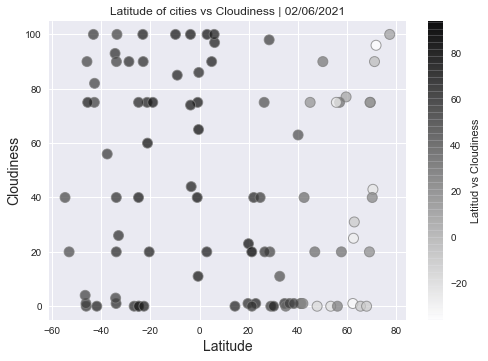

In [187]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Cloudiness']
plt.scatter(x, y, s=100, c=ratio, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Cloudiness | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Cloudiness", fontsize="14")
cbar= plt.colorbar()
cbar.set_label('Latitud vs Cloudiness')

## Latitude vs. Wind Speed Plot

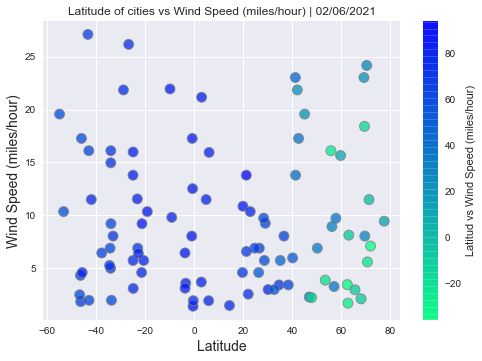

In [188]:
date = clean_city_data['Date'].max()
plt.style.use('seaborn')
x = clean_city_data['Lat']
y = clean_city_data['Wind Speed']
plt.scatter(x, y, s=100, c=ratio, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.title(f"Latitude of cities vs Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", fontsize="14")
plt.ylabel(f"Wind Speed (miles/hour)", fontsize="14")
cbar = plt.colorbar()
cbar.set_label('Latitud vs Wind Speed (miles/hour)')


## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

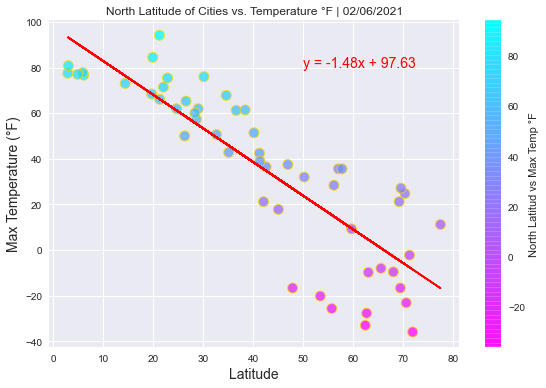

the intercept :97.626
correlation:-0.854
Lat linear regression model :y = -1.48x + 97.63
 I observe that both variables have a very high inverse (negative) correlation based on the value: -0.854, that is -85.4%, which indicates that are inversely proportional, as long as the Latitude decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.


In [189]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
#Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Temp']
ratio_Northern = Northern_city_data['Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,80),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Temperature °F | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Max Temp °F')
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"===============================================")
print(f" I observe that both variables have a very high inverse (negative) correlation \
based on the value: {correlation_North}, that is {round(correlation_North*100,2)}%, which \
indicates that are inversely proportional, as long as the Latitude \
decreases, approaches 0° (Equator), the Temeprature °F increases in the same proportion.")
#print(f"Lat linear regression model :{line_north}");
#plt.style.use('seaborn')
#plt.scatter(x,y, s=100, c='blue', edgecolor='black', linewidth=1, alpha=0.75)
#plt.plot(x_north,regress_values,"r-")
#plt.title(f"Latitude of Cities vs. Temperature | {date}", fontsize = "12")
#plt.xlabel(f"Latitude", fontsize="14")
#plt.ylabel(f"Max Temperature (F)", fontsize="14")
#cbar= plt.colorbar()
#cbar.set_label('Latitud vs max Temperature')

#plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

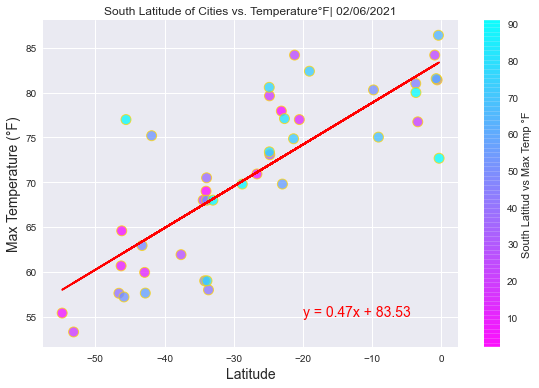

the intercept :83.528
correlation:0.8
Lat linear regression model :y = 0.47x + 83.53
 There is a very high correlation based on the value 0.8, that is: 80.0%, which indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), the Temeprature °F also increases, in the same proportion.


In [190]:
# Southern Hemisphere = Latitude between 0 ° and -90 °: Southern Hemisphere
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Temp']
ratio_Southern = Southern_city_data['Temp'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="cool_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,55),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Temperature°F| {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Max Temperature (°F)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Max Temp °F')
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f" There is a very high correlation based on the value {correlation_South}, that is: {round(correlation_South*100,2)}%, which \
indicates that they are directly proportional, while the Latitude increases, Lat approaches zero (Equator), \
the Temeprature °F also increases, in the same proportion.")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

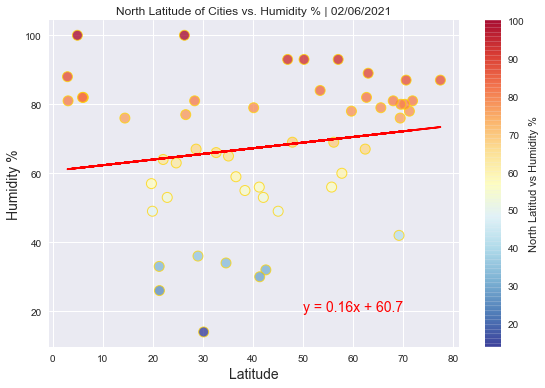

the intercept :60.7
correlation:0.17
Lat linear regression model :y = 0.16x + 60.7
There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, the correlation value is 17.0%, although it is positive, it does not show a trend between both variables


In [191]:
# Northern Hemisphere = Latitude between 0 ° and 90 °: Northern Hemisphere
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
#Northern_city_data = meteorology_cities[(meteorology_cities['Lat'] > 0)]
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Humidity']
ratio_Northern = Northern_city_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Humidity %')
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"=============================================")
print(f"There is an absence of correlation between Northern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive, it does not show a trend between both variables")
      

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

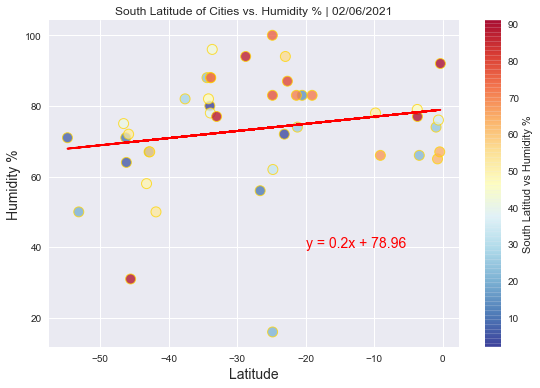

the intercept :78.963
correlation:0.2
Lat linear regression model :y = 0.2x + 78.96
There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, the correlation value is 20.0%, although it is positive, it does not show a trend between both variables


In [192]:
Southern_city_data = meteorology_cities[(meteorology_cities['Lat'] < 0)]
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Humidity']
ratio_Southern = Southern_city_data['Humidity'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="RdYlBu_r", edgecolor="#FFD500", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Humidity % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Humidity %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Humidity %')
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is an absence of correlation between Southern Hemisphere Latitude and Humidity %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive, it does not show a trend between both variables")


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

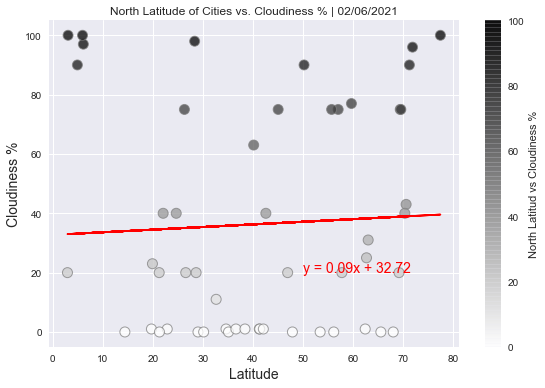

the intercept :32.72
correlation:0.05
Lat linear regression model :y = 0.09x + 32.72
There is an absence of correlation (no correlation) between Latitude and Cloudiness %, the correlation value is 5.0%, although it is positive


In [193]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Cloudiness']
ratio_Northern = Northern_city_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Cloudiness %')
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")
print(f"There is an absence of correlation (no correlation) between Latitude and Cloudiness %, \
the correlation value is {round(correlation_North*100,2)}%, although it is positive")


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

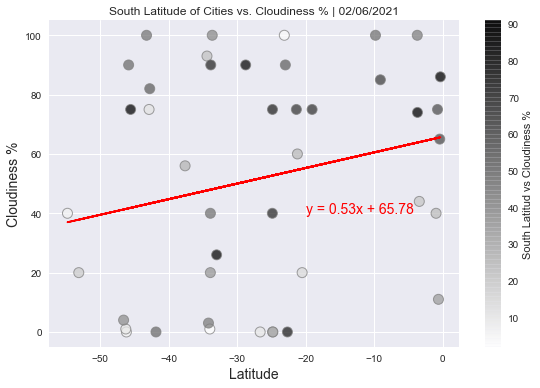

the intercept :65.778
correlation:0.23
Lat linear regression model :y = 0.53x + 65.78
There is no correlation between Latitude and Cloudiness %, the correlation value is 23.0%, although it is positive


In [194]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Cloudiness']
ratio_Southern = Southern_city_data['Cloudiness'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,40),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Cloudiness % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Cloudiness %", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Cloudiness %')
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")
print(f"There is no correlation between Latitude and Cloudiness %, \
the correlation value is {round(correlation_South*100,2)}%, although it is positive")


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

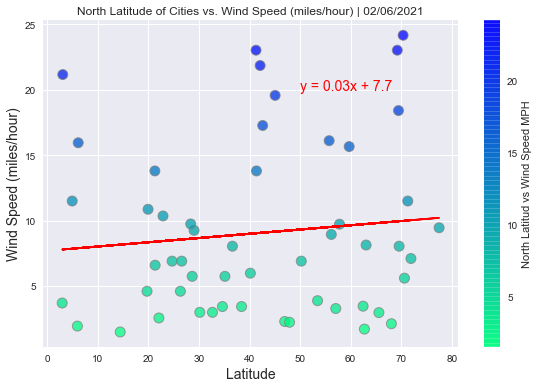

the intercept :7.7
correlation:0.106
Lat linear regression model :y = 0.03x + 7.7


In [195]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Northern_city_data['Date'].max()
x_north=Northern_city_data['Lat']
y_north=Northern_city_data['Wind Speed']
ratio_Northern = Northern_city_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_north, y_north)
#print(f"the intercept :{round(intercept,2)}");
regress_values_north = x_north * slope + intercept
line_North = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_North = round(rvalue,3)
plt.style.use('seaborn')
Norte = plt.scatter(x_north, y_north, s=100, c=ratio_Northern, cmap="winter_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_north,regress_values_north,"r-")
plt.annotate(line_North,(50,20),fontsize=14, color="red")
plt.title(f"North Latitude of Cities vs. Wind Speed (miles/hour) | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed (miles/hour)", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('North Latitud vs Wind Speed MPH')
plt.show();
print(f"the intercept :{round(intercept,2)}");
print(f"correlation:{round(correlation_North,3)}");
print(f"Lat linear regression model :{line_North}");
print(f"==============================================")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

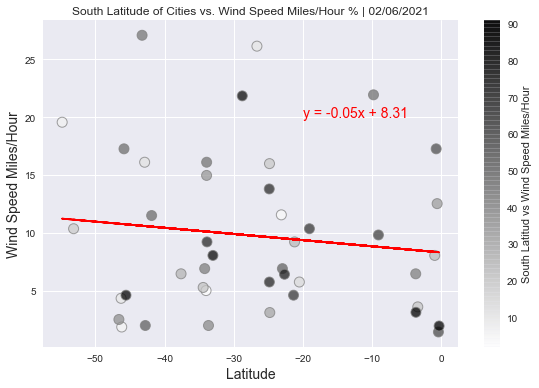

the intercept :8.306
correlation:-0.13
Lat linear regression model :y = -0.05x + 8.31


In [197]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
date = Southern_city_data['Date'].max()
x_South=Southern_city_data['Lat']
y_South=Southern_city_data['Wind Speed']
ratio_Southern = Southern_city_data['Wind Speed'].index
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_South, y_South)
#print(f"the intercept :{round(intercept,2)}");
regress_values_South = x_South * slope + intercept
line_South = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
correlation_South = round(rvalue,2)
plt.style.use('seaborn')
sur = plt.scatter(x_South, y_South, s=100, c=ratio_Southern, cmap="gist_gray_r", edgecolor="grey", linewidth=1, alpha=0.75);
plt.plot(x_South,regress_values_South,"r-")
plt.annotate(line_South,(-20,20),fontsize=14, color="red")
plt.title(f"South Latitude of Cities vs. Wind Speed Miles/Hour % | {date}", fontsize = "12")
plt.xlabel(f"Latitude", size=14)
plt.ylabel(f"Wind Speed Miles/Hour", size=14)
plt.tight_layout()
cbar= plt.colorbar()
cbar.set_label('South Latitud vs Wind Speed Miles/Hour')
plt.show();
print(f"the intercept :{round(intercept,3)}");
print(f"correlation:{round(correlation_South,3)}");
print(f"Lat linear regression model :{line_South}");
print(f"==============================================")